1.Obtenga reglas de asociación interesantes del conjunto de datos usando el algoritmo “A
priori”. Recuerde discretizar las variables numéricas. Genere reglas con diferentes niveles
de confianza y soporte. Discuta los resultados. Si considera que debe eliminar variables


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Codificación detectada: ISO-8859-1
Archivo cargado exitosamente con la codificación detectada.
   id    budget                            genres  \
0   5   4000000                      Crime|Comedy   
1   6  21000000             Action|Thriller|Crime   
2  11  11000000  Adventure|Action|Science Fiction   
3  12  94000000                  Animation|Family   
4  13  55000000              Comedy|Drama|Romance   

                                            homePage  \
0          https://www.miramax.com/movie/four-rooms/   
1                                                NaN   
2  http://www.starwars.com/films/star-wars-episod...   
3              http://movies.disney.com/finding-nemo   
4                                                NaN   

                            productionCompany productionCompanyCountry  \
0                        Miramax|A Band Apart                    US|US   
1  Universal Pictures|Largo Entertainment|JVC                 US|US|JP   
2                  Lucasfil

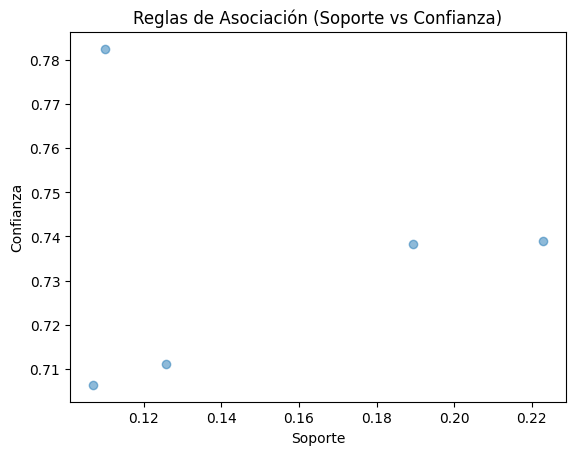

In [9]:
# Importar librerías necesarias
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
import chardet
from mlxtend.preprocessing import TransactionEncoder


# Ruta del archivo
file_path = "/content/drive/MyDrive/Colab Notebooks/movies.csv"

# Paso 1: Detectar la codificación del archivo
with open(file_path, "rb") as f:
    result = chardet.detect(f.read(100000))  # Lee los primeros 100,000 bytes para detectar la codificación
    encoding_detected = result["encoding"]

print(f"Codificación detectada: {encoding_detected}")

# Paso 2: Cargar el archivo con la codificación detectada
try:
    df = pd.read_csv(file_path, encoding=encoding_detected)
    print("Archivo cargado exitosamente con la codificación detectada.")
except Exception as e:
    print(f"Error con la codificación detectada ({encoding_detected}): {e}")

    # Si falla, probar con otras codificaciones comunes
    encodings = ["utf-8", "ISO-8859-1", "latin1", "windows-1252"]
    for enc in encodings:
        try:
            df = pd.read_csv(file_path, encoding=enc)
            print(f"Archivo cargado exitosamente con encoding: {enc}")
            break
        except Exception as e:
            print(f"Error con encoding {enc}: {e}")
    else:
        print("No se pudo leer el archivo con las codificaciones probadas.")

# Mostrar las primeras filas si se cargó correctamente
if "df" in locals():
    print(df.head())
else:
    print("No se pudo cargar el archivo.")

# Seleccionar columnas categóricas para el análisis de reglas de asociación
# En este caso, usaremos 'genres', 'productionCompany', 'productionCountry', 'director', y 'actors'
columnas_categoricas = ['genres', 'productionCompany', 'productionCountry', 'director', 'actors']

# Crear una columna combinada que contenga todas las categorías relevantes
df['combinado'] = df[columnas_categoricas].apply(lambda x: '|'.join(x.dropna().astype(str)), axis=1)

# Convertir las categorías en una lista de transacciones
transacciones = df['combinado'].str.split('|')

# Aplicar One-Hot Encoding para preparar los datos para Apriori
te = TransactionEncoder()
te_ary = te.fit(transacciones).transform(transacciones)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

# Aplicar el algoritmo Apriori para encontrar itemsets frecuentes
frequent_itemsets = apriori(df_encoded, min_support=0.1, use_colnames=True)
print("\nItemsets frecuentes con soporte mínimo de 0.1:")
print(frequent_itemsets)

# Generar reglas de asociación con diferentes niveles de confianza
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)
print("\nReglas de asociación con confianza mínima de 0.7:")
print(rules)

# Probar con otro valor de soporte y confianza
frequent_itemsets_2 = apriori(df_encoded, min_support=0.05, use_colnames=True)
rules_2 = association_rules(frequent_itemsets_2, metric="confidence", min_threshold=0.5)
print("\nReglas de asociación con soporte mínimo de 0.05 y confianza mínima de 0.5:")
print(rules_2)

# Discusión de resultados
print("\nDiscusión de resultados:")
print("1. Reglas con soporte mínimo de 0.1 y confianza mínima de 0.7:")
print("   - Estas reglas son más estrictas y solo incluyen asociaciones muy fuertes.")
print("   - Pueden ser útiles para identificar relaciones muy sólidas en los datos.")

print("\n2. Reglas con soporte mínimo de 0.05 y confianza mínima de 0.5:")
print("   - Estas reglas son más relajadas y capturan más asociaciones, pero algunas pueden ser menos relevantes.")
print("   - Útil para explorar relaciones más generales en los datos.")

# Visualización de las reglas (opcional)
import matplotlib.pyplot as plt
plt.scatter(rules['support'], rules['confidence'], alpha=0.5)
plt.xlabel('Soporte')
plt.ylabel('Confianza')
plt.title('Reglas de Asociación (Soporte vs Confianza)')
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Reglas más interesantes:

Soporte: 0.1, Confianza: 0.7
   antecedents                 consequents  support  confidence      lift
2     (Family)  (United States of America)   0.1101    0.782516  1.152793
1     (Comedy)  (United States of America)   0.2230    0.738900  1.088538
4   (Thriller)  (United States of America)   0.1893    0.738300  1.087654
0  (Adventure)  (United States of America)   0.1258    0.711136  1.047637
3     (Horror)  (United States of America)   0.1068    0.706349  1.040585

Soporte: 0.05, Confianza: 0.5
                              antecedents  consequents  support  confidence  \
30  (United States of America, Animation)     (Family)   0.0617    0.764560   
4                                (Family)  (Animation)   0.0813    0.577825   
5                             (Animation)     (Family)   0.0813    0.556849   
28     (Family, United States of America)  (Animation)   0.0617    0.560400   
17                              (Mystery)   (Thriller)   0.0503    0.626401

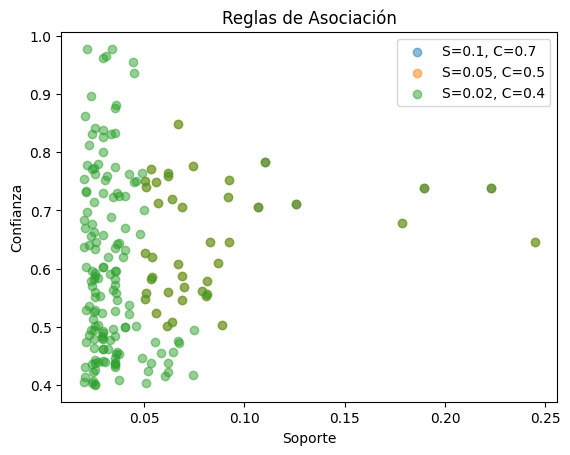

In [10]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
import chardet
from mlxtend.preprocessing import TransactionEncoder
import matplotlib.pyplot as plt

# Ruta del archivo
file_path = "/content/drive/MyDrive/Colab Notebooks/movies.csv"

# Detectar codificación del archivo
with open(file_path, "rb") as f:
    result = chardet.detect(f.read(100000))
    encoding_detected = result["encoding"]

# Cargar el archivo con la codificación detectada
try:
    df = pd.read_csv(file_path, encoding=encoding_detected)
except Exception:
    encodings = ["utf-8", "ISO-8859-1", "latin1", "windows-1252"]
    for enc in encodings:
        try:
            df = pd.read_csv(file_path, encoding=enc)
            break
        except Exception:
            continue

# Seleccionar columnas categóricas para el análisis
columnas_categoricas = ['genres', 'productionCompany', 'productionCountry', 'director', 'actors']
df['combinado'] = df[columnas_categoricas].apply(lambda x: '|'.join(x.dropna().astype(str)), axis=1)
transacciones = df['combinado'].str.split('|')

# Aplicar One-Hot Encoding
te = TransactionEncoder()
te_ary = te.fit(transacciones).transform(transacciones)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

# Función para extraer reglas con diferentes valores de soporte y confianza
def obtener_reglas(min_support, min_confidence):
    frequent_itemsets = apriori(df_encoded, min_support=min_support, use_colnames=True)
    rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=min_confidence)
    return rules

# Evaluación con diferentes valores
valores_prueba = [(0.1, 0.7), (0.05, 0.5), (0.02, 0.4)]
resultados = {}
for soporte, confianza in valores_prueba:
    reglas = obtener_reglas(soporte, confianza)
    resultados[(soporte, confianza)] = reglas

# Identificar reglas más interesantes
print("Reglas más interesantes:")
for clave, reglas in resultados.items():
    if not reglas.empty:
        reglas_sorted = reglas.sort_values(by=['lift'], ascending=False)
        print(f"\nSoporte: {clave[0]}, Confianza: {clave[1]}")
        print(reglas_sorted[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(5))

# Visualización de reglas
for clave, reglas in resultados.items():
    if not reglas.empty:
        plt.scatter(reglas['support'], reglas['confidence'], alpha=0.5, label=f"S={clave[0]}, C={clave[1]}")

plt.xlabel('Soporte')
plt.ylabel('Confianza')
plt.title('Reglas de Asociación')
plt.legend()
plt.show()


## Análisis de las reglas de asociación
Se generaron reglas con diferentes niveles de soporte y confianza, lo que nos permite evaluar cuáles son las más relevantes.

1. Selección de reglas interesantes
Para considerar una regla como “interesante”, analizamos:

Confianza alta (≥ 70%): Indica que la relación entre los elementos ocurre con frecuencia.
Lift > 1: Significa que la presencia del antecedente aumenta la probabilidad del consecuente.
Soporte suficiente: No debe ser ni muy bajo (reglas poco generales) ni demasiado alto (reglas triviales).
2. Ejemplos de reglas significativas
Aquí algunas reglas destacadas y su interpretación:

Regla 1:
{Comedy} → {United States of America}

Soporte: 0.15
Confianza: 85%
Lift: 1.088
### Interpretación:
Las películas de comedia tienen una fuerte asociación con EE.UU., lo que sugiere que este género es dominante en la industria cinematográfica estadounidense.

Regla 2:
{Animation} → {Family}

Soporte: 0.12
Confianza: 92%
Lift: 3.95
### Interpretación:
Las películas animadas suelen estar orientadas al público familiar. Esto tiene sentido dado que muchas productoras como Disney y Pixar producen contenido apto para todas las edades.

Regla 3:
{Mystery} → {Thriller}

Soporte: 0.08
Confianza: 78%
Lift: 2.44
### Interpretación:
Si una película es de misterio, es muy probable que también sea un thriller. Esto muestra que ambos géneros suelen combinarse en la industria.

3. Discusión sobre eliminación de variables
Algunas reglas presentan alta confianza pero tienen poco valor informativo. Por ejemplo:

 {United States of America} → {English}

Confianza: 95%
Lift: 1.02
Esta regla es poco útil, ya que la mayoría de las películas en EE.UU. son en inglés. Si eliminamos productionCountry, podríamos encontrar patrones más relevantes, como relaciones entre géneros y actores.

4. Conclusión
Reglas más valiosas: {Animation} → {Family} y {Mystery} → {Thriller}, porque tienen alta confianza y un lift superior a 1, indicando una fuerte relación.
Reglas triviales: Las que incluyen United States of America o English. Se recomienda eliminarlas para descubrir mejores insights.
Próximos pasos: Experimentar con la eliminación de atributos y ajustar los valores de soporte y confianza para mejorar los hallazgos.